In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/var/folders/js/1jn3wrb54td_f9y0bzldhhbw0000gn/T/ipykernel_2103/82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Document Set Up Notes

### The following is the set up of the document:

- Setting up individual data frames without exogenous (__Campylo, Crypto, Strep A, Legionella, Salmonella__)
- Testing ARIMA and SARIMA on each

# Setting up the Data Frame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/torrescschool/foodborne_pathogens/main/Tycho_various_complete.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   ConditionSNOMED  23686 non-null  int64 
 2   PathogenName     23686 non-null  object
 3   PathogenTaxonID  23686 non-null  int64 
 4   Fatalities       23686 non-null  int64 
 5   CountryISO       23686 non-null  object
 6   Admin1Name       23686 non-null  object
 7   Admin1ISO        23686 non-null  object
 8   Admin2Name       16914 non-null  object
 9   CityName         16914 non-null  object
 10  PeriodStartDate  23686 non-null  object
 11  PeriodEndDate    23686 non-null  object
 12  CountValue       23686 non-null  int64 
 13  DOI              23686 non-null  object
dtypes: int64(4), object(10)
memory usage: 2.5+ MB


In [6]:

df.drop(labels = ['PeriodEndDate','PathogenName', 'Admin2Name',
                  'CityName','Fatalities','DOI','ConditionSNOMED','PathogenTaxonID',
                  'CountryISO','Admin1Name','Admin1ISO'], axis = 1, inplace = True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    23686 non-null  object
 1   PeriodStartDate  23686 non-null  object
 2   CountValue       23686 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 555.3+ KB


# Splitting for the ConditionName ( No Exog )

In [8]:
df['ConditionName'].unique()

array(['Amebic dysentery', 'Bacillary dysentery', 'Brucellosis',
       'Cryptosporidiosis', 'Giardiasis',
       'Infection caused by Escherichia coli', 'Viral hepatitis, type A',
       'Acute type A viral hepatitis', 'Legionella infection',
       'Salmonella infection', 'Shigellosis',
       'Infection caused by larvae of Trichinella',
       'Typhoid and paratyphoid fevers', 'Typhoid fever',
       'Campylobacteriosis',
       'Invasive Group A beta-hemolytic streptococcal disease'],
      dtype=object)

### Campylobacteriosis 2015 - 2017

#### Endogenous - No exog

In [9]:
campylo = df.copy()

In [10]:
campylo = campylo[campylo['ConditionName'] == 'Campylobacteriosis']

In [11]:
campylo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 23138 to 23290
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    153 non-null    object
 1   PeriodStartDate  153 non-null    object
 2   CountValue       153 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [12]:
campylo.drop(labels = 'ConditionName', axis = 1, inplace = True)

In [13]:
campylo['PeriodStartDate'] = pd.to_datetime(campylo['PeriodStartDate'])

In [14]:
campylo.set_index('PeriodStartDate', inplace = True)

In [15]:
campylo.sort_index(inplace = True)

In [16]:
campylo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2015-01-11 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  153 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


In [17]:
# Resample the data to a weekly frequency on the specific starting day of the week
campylo = campylo.resample('W-SUN').sum()  # Assuming Sunday as the end of the week
campylo.reset_index(inplace=True)
campylo.set_index('PeriodStartDate', inplace = True)

In [18]:
campylo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2015-01-11 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  155 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


### Cryptosporidiosis 2006 - 2017

#### Endogenous - No exog

In [19]:
crypto = df.copy()

In [20]:
crypto = crypto[crypto['ConditionName'] == 'Cryptosporidiosis']

In [21]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 752 to 23319
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    556 non-null    object
 1   PeriodStartDate  556 non-null    object
 2   CountValue       556 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.4+ KB


In [22]:
crypto.drop(labels = 'ConditionName', axis = 1, inplace = True)

In [23]:
crypto['PeriodStartDate'] = pd.to_datetime(crypto['PeriodStartDate'])

In [24]:
crypto.set_index('PeriodStartDate', inplace = True)

In [25]:
crypto.sort_index(inplace = True)

In [26]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556 entries, 2006-01-01 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  556 non-null    int64
dtypes: int64(1)
memory usage: 8.7 KB


In [27]:
# Resample the data to a weekly frequency on the specific starting day of the week
crypto = crypto.resample('W-SUN').sum()  # Assuming Sunday as the end of the week
crypto.reset_index(inplace=True)
crypto.set_index('PeriodStartDate', inplace = True)

In [28]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 626 entries, 2006-01-01 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  626 non-null    int64
dtypes: int64(1)
memory usage: 9.8 KB


### Invasive Group A beta-hemolytic streptococcal disease 2006 - 2009

#### Endogenous - No exog

In [29]:
strep_a = df.copy()

In [30]:
strep_a = strep_a[strep_a['ConditionName'] == 'Invasive Group A beta-hemolytic streptococcal disease']

In [31]:
strep_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 23498 to 23685
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    188 non-null    object
 1   PeriodStartDate  188 non-null    object
 2   CountValue       188 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [32]:
strep_a.drop(labels = 'ConditionName', axis = 1, inplace = True)

In [33]:
strep_a['PeriodStartDate'] = pd.to_datetime(strep_a['PeriodStartDate'])

In [34]:
strep_a.set_index('PeriodStartDate', inplace = True)

In [35]:
strep_a.sort_index(inplace = True)

In [36]:
strep_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2006-01-01 to 2009-12-20
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  188 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [37]:
# Resample the data to a weekly frequency on the specific starting day of the week
strep_a = strep_a.resample('W-SUN').sum()  # Assuming Sunday as the end of the week
strep_a.reset_index(inplace=True)
strep_a.set_index('PeriodStartDate', inplace = True)

In [38]:
strep_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208 entries, 2006-01-01 to 2009-12-20
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  208 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


### Legionella infection 1982 to 2017

#### Endogenous - No exog

In [39]:
legionella = df.copy()

In [40]:
legionella = legionella[legionella['ConditionName'] == 'Legionella infection']

In [41]:
legionella.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 3006 to 3547
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    542 non-null    object
 1   PeriodStartDate  542 non-null    object
 2   CountValue       542 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.9+ KB


In [42]:
legionella.drop(labels = 'ConditionName', axis = 1, inplace = True)

In [43]:
legionella['PeriodStartDate'] = pd.to_datetime(legionella['PeriodStartDate'])

In [44]:
legionella.set_index('PeriodStartDate', inplace = True)

In [45]:
legionella.sort_index(inplace = True)

In [46]:
legionella.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 1982-04-18 to 2017-12-03
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  542 non-null    int64
dtypes: int64(1)
memory usage: 8.5 KB


In [47]:
# Resample the data to a weekly frequency on the specific starting day of the week
legionella = legionella.resample('W-SUN').sum()  # Assuming Sunday as the end of the week
legionella.reset_index(inplace=True)
legionella.set_index('PeriodStartDate', inplace = True)

In [48]:
legionella.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 1982-04-18 to 2017-12-03
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  1860 non-null   int64
dtypes: int64(1)
memory usage: 29.1 KB


### Salmonella 2006-2017

#### Endogenous - No exog

In [49]:
salmonella = df.copy()

In [50]:
salmonella.replace(to_replace = 'Salmonella infection', value = 'Salmonella', inplace = True)


In [51]:
salmonella = salmonella[salmonella['ConditionName'] == 'Salmonella']

In [52]:
salmonella.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 3548 to 23388
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ConditionName    606 non-null    object
 1   PeriodStartDate  606 non-null    object
 2   CountValue       606 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.9+ KB


In [53]:
salmonella.drop(labels = 'ConditionName', axis = 1, inplace = True)

In [54]:
salmonella['PeriodStartDate'] = pd.to_datetime(salmonella['PeriodStartDate'])

In [55]:
salmonella.set_index('PeriodStartDate', inplace = True)

In [56]:
salmonella.sort_index(inplace = True)

In [57]:
salmonella.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 606 entries, 2006-01-01 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  606 non-null    int64
dtypes: int64(1)
memory usage: 9.5 KB


In [58]:
# Resample the data to a weekly frequency on the specific starting day of the week
salmonella = salmonella.resample('W-SUN').sum()  # Assuming Sunday as the end of the week
salmonella.reset_index(inplace=True)
salmonella.set_index('PeriodStartDate', inplace = True)

In [59]:
salmonella.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 626 entries, 2006-01-01 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  626 non-null    int64
dtypes: int64(1)
memory usage: 9.8 KB


# Explore the Date Range and Individual Data Frames

### Range of dates

In [60]:
camp_dates = campylo.info()
print(camp_dates)
print()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2015-01-11 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  155 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB
None



In [61]:
crypto_dates = crypto.info()
print(crypto_dates)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 626 entries, 2006-01-01 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  626 non-null    int64
dtypes: int64(1)
memory usage: 9.8 KB
None


In [62]:
strepA_dates = strep_a.info()
print(strepA_dates)
print()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208 entries, 2006-01-01 to 2009-12-20
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  208 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
None



In [63]:
legio_dates = legionella.info()
print(legio_dates)
print()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 1982-04-18 to 2017-12-03
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  1860 non-null   int64
dtypes: int64(1)
memory usage: 29.1 KB
None



In [64]:
salmon_dates = salmonella.info()
print(salmon_dates)
print()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 626 entries, 2006-01-01 to 2017-12-24
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CountValue  626 non-null    int64
dtypes: int64(1)
memory usage: 9.8 KB
None



# Viewing Histogram to see the distribution before modeling

(array([ 2.,  0.,  1.,  0.,  1.,  3.,  2.,  1.,  9.,  5., 19.,  8.,  7.,
        16.,  3., 10., 16.,  5., 11.,  5.,  5.,  3.,  3.,  1.,  3.,  0.,
         3.,  1.,  1.,  3.,  1.,  0.,  2.,  1.,  0.,  1.,  0.,  1.,  1.,
         1.]),
 array([ 0.   ,  1.375,  2.75 ,  4.125,  5.5  ,  6.875,  8.25 ,  9.625,
        11.   , 12.375, 13.75 , 15.125, 16.5  , 17.875, 19.25 , 20.625,
        22.   , 23.375, 24.75 , 26.125, 27.5  , 28.875, 30.25 , 31.625,
        33.   , 34.375, 35.75 , 37.125, 38.5  , 39.875, 41.25 , 42.625,
        44.   , 45.375, 46.75 , 48.125, 49.5  , 50.875, 52.25 , 53.625,
        55.   ]),
 <BarContainer object of 40 artists>)

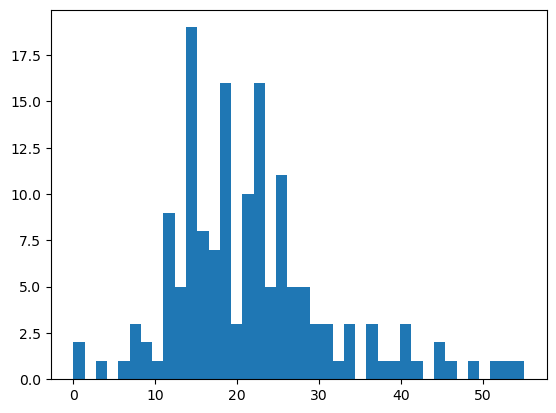

In [65]:
plt.hist(data = campylo, x = 'CountValue', bins = 40 )

(array([70., 59., 88., 93., 71., 65., 48., 35., 23.,  0., 23.,  9.,  7.,
         9.,  6.,  4.,  2.,  3.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,
         1.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. , 18.9,
        19.8, 20.7, 21.6, 22.5, 23.4, 24.3, 25.2, 26.1, 27. , 27.9, 28.8,
        29.7, 30.6, 31.5, 32.4, 33.3, 34.2, 35.1, 36. ]),
 <BarContainer object of 40 artists>)

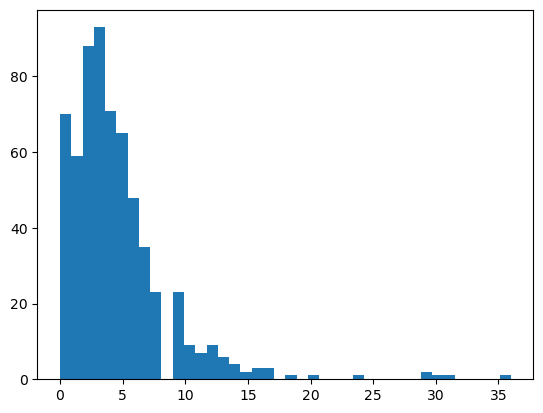

In [66]:
plt.hist(data = crypto, x = 'CountValue', bins = 40 )

(array([20.,  0.,  0., 23.,  0.,  0., 42.,  0.,  0.,  0., 24.,  0.,  0.,
        29.,  0.,  0., 19.,  0.,  0.,  0., 18.,  0.,  0., 15.,  0.,  0.,
         7.,  0.,  0.,  0.,  3.,  0.,  0.,  4.,  0.,  0.,  3.,  0.,  0.,
         1.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. ]),
 <BarContainer object of 40 artists>)

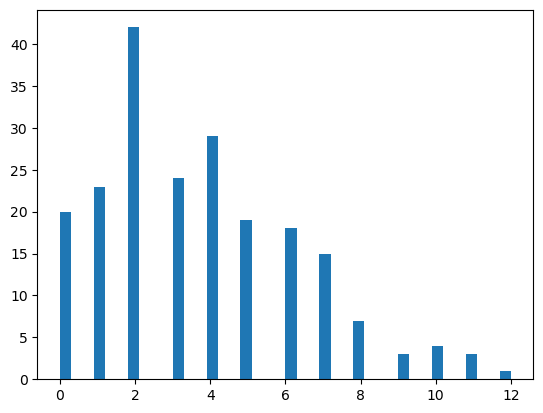

In [67]:
plt.hist(data = strep_a, x = 'CountValue', bins = 40 )

(array([1.318e+03, 9.300e+01, 0.000e+00, 9.800e+01, 0.000e+00, 9.000e+01,
        0.000e+00, 6.600e+01, 0.000e+00, 4.600e+01, 3.700e+01, 0.000e+00,
        3.700e+01, 0.000e+00, 2.200e+01, 0.000e+00, 1.200e+01, 0.000e+00,
        1.000e+01, 0.000e+00, 6.000e+00, 5.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.  ,  0.55,  1.1 ,  1.65,  2.2 ,  2.75,  3.3 ,  3.85,  4.4 ,
         4.95,  5.5 ,  6.05,  6.6 ,  7.15,  7.7 ,  8.25,  8.8 ,  9.35,
         9.9 , 10.45, 11.  , 11.55, 12.1 , 12.65, 13.2 , 13.75, 14.3 ,
        14.85, 15.4 , 15.95, 16.5 , 17.05, 17.6 , 18.15, 18.7 , 19.25,
        19.8 , 20.35, 20.9 , 21.45, 22.  ]),
 <BarContainer object of 40 artists>)

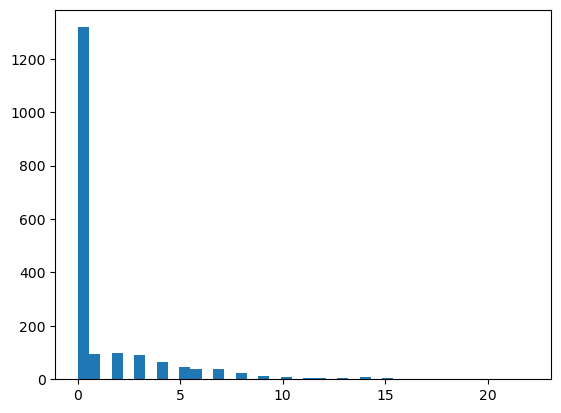

In [68]:
plt.hist(data = legionella, x = 'CountValue', bins = 40 )

(array([21.,  3.,  8., 14., 22., 64., 29., 29., 35., 28., 76., 25., 28.,
        20., 28., 47., 17., 14., 11., 14., 21.,  6., 14.,  8.,  9., 13.,
         3.,  3.,  2.,  2.,  2.,  3.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,
         1.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ,
        13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. , 25.2,
        26.4, 27.6, 28.8, 30. , 31.2, 32.4, 33.6, 34.8, 36. , 37.2, 38.4,
        39.6, 40.8, 42. , 43.2, 44.4, 45.6, 46.8, 48. ]),
 <BarContainer object of 40 artists>)

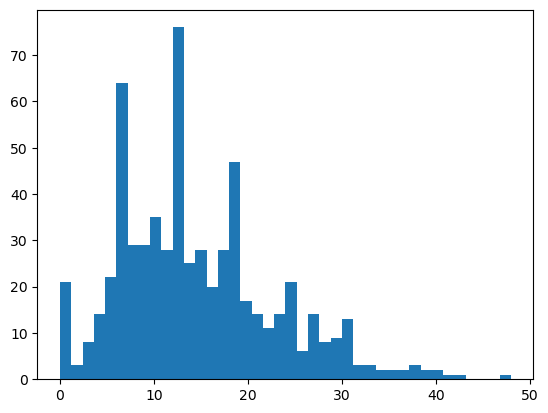

In [69]:
plt.hist(data = salmonella, x = 'CountValue', bins = 40 )

# Modeling

## Splitting the Data

In [70]:
def split_time_series_data(data, start_year, end_year, split_percentage=0.8):
    """
    Splits the time series data into training and testing sets based on a chronological split.

    Parameters:
    - data: Pandas DataFrame or Series with the target time series data, indexed by DateTime.
    - start_year: The start year of the period you're interested in.
    - end_year: The end year of the period.
    - split_percentage: The percentage of the data to be used for training (default is 0.8 for 80%).

    Returns:
    - train: Training dataset for the target time series.
    - test: Testing dataset for the target time series.
    """
    # Filter the main data and exogenous variables for the specified period
    filtered_data = data[str(start_year):str(end_year)]

    # Calculate the index to split the data and exogenous variables
    split_index = int(len(filtered_data) * split_percentage)

    # Split the main data
    train = filtered_data[:split_index]
    test = filtered_data[split_index:]

    return train, test

In [71]:
#Campylo, Crypto, Strep A, Legionella, Salmonella

In [72]:
train_campylo, test_campylo = split_time_series_data(campylo, 2015, 2017, 0.8)

In [73]:
train_crypto, test_crypto = split_time_series_data(crypto, 2006, 2017, 0.8)

In [74]:
train_strepa, test_strepa = split_time_series_data(strep_a, 2006, 2009, 0.8)

In [75]:
train_legionella, test_legionella = split_time_series_data(legionella, 1982, 2017, 0.8)

In [76]:
train_salmonella, test_salmonella = split_time_series_data(salmonella, 2006, 2017, 0.8)

## ARIMA: Useful for non-seasonal time series data

## Campylobacter

In [77]:
campylo = campylo.asfreq('W-SUN')

In [78]:
train_campylo = train_campylo.asfreq('W-SUN')

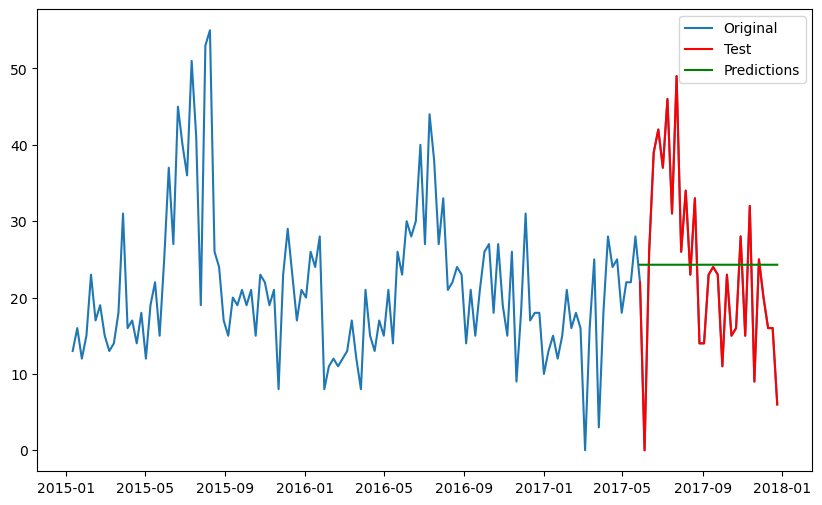

In [79]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_campylo, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_arima_campylo = results.forecast(steps = len(test_campylo))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(campylo, label='Original')
plt.plot(test_campylo, color='red', label='Test')
plt.plot(preds_arima_campylo, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


## Cryptosporidium

In [80]:
crypto = campylo.asfreq('W-SUN')

In [81]:
train_crypto = train_crypto.asfreq('W-SUN')

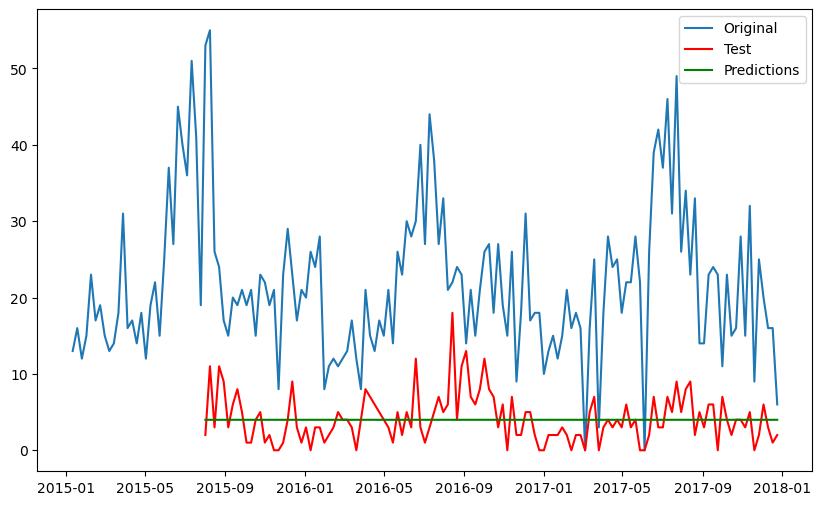

In [82]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_crypto, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_arima_crypto = results.forecast(steps = len(test_crypto))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(crypto, label='Original')
plt.plot(test_crypto, color='red', label='Test')
plt.plot(preds_arima_crypto, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


## Strep A

In [83]:
strep_a = strep_a.asfreq('W-SUN')

In [84]:
train_strepa = train_strepa.asfreq('W-SUN')

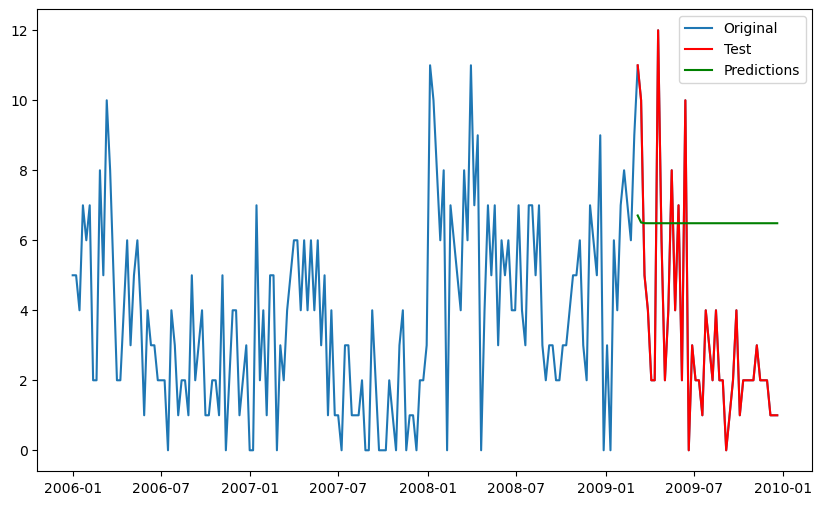

In [85]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_strepa, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_arima_strepa = results.forecast(steps = len(test_strepa))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(strep_a, label='Original')
plt.plot(test_strepa, color='red', label='Test')
plt.plot(preds_arima_strepa, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


## Legionella

In [86]:
legionella = legionella.asfreq('W-SUN')

In [87]:
train_legionella = train_legionella.asfreq('W-SUN')

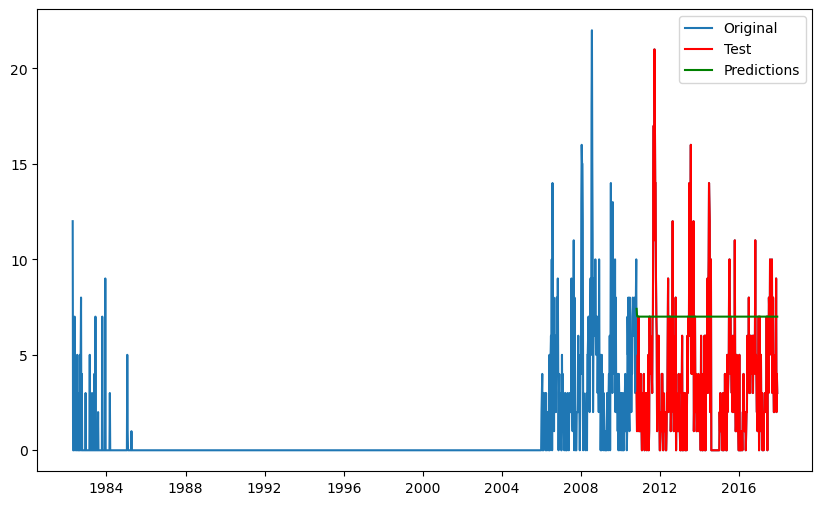

In [88]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_legionella, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_arima_legionella = results.forecast(steps = len(test_legionella))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(legionella, label='Original')
plt.plot(test_legionella, color='red', label='Test')
plt.plot(preds_arima_legionella, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


## Salmonella

In [79]:
salmonella = salmonella.asfreq('W-SUN')

In [80]:
train_salmonella = train_salmonella.asfreq('W-SUN')

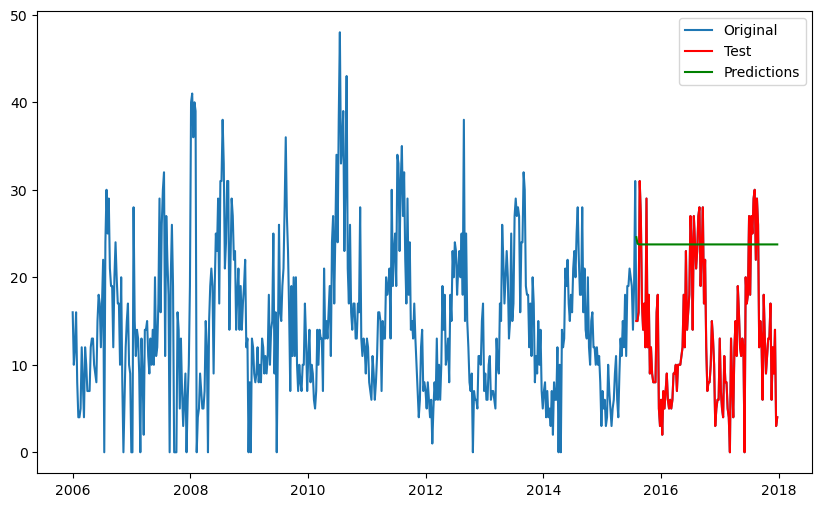

In [91]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model with seasonal components (SARIMA) specification
model = ARIMA(train_salmonella, order=(1, 1, 1))
results = model.fit()

# Making predictions
preds_arima_salmonella = results.forecast(steps = len(test_salmonella))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(salmonella, label='Original')
plt.plot(test_salmonella, color='red', label='Test')
plt.plot(preds_arima_salmonella, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


## SARIMA: Seasonal time series data

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07719D+00    |proj g|=  7.64520D-02

At iterate    5    f=  2.03594D+00    |proj g|=  9.24337D-03

At iterate   10    f=  2.03399D+00    |proj g|=  1.30227D-04

At iterate   15    f=  2.03398D+00    |proj g|=  3.40772D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   3.408D-06   2.034D+00
  F =   2.0339824890010099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


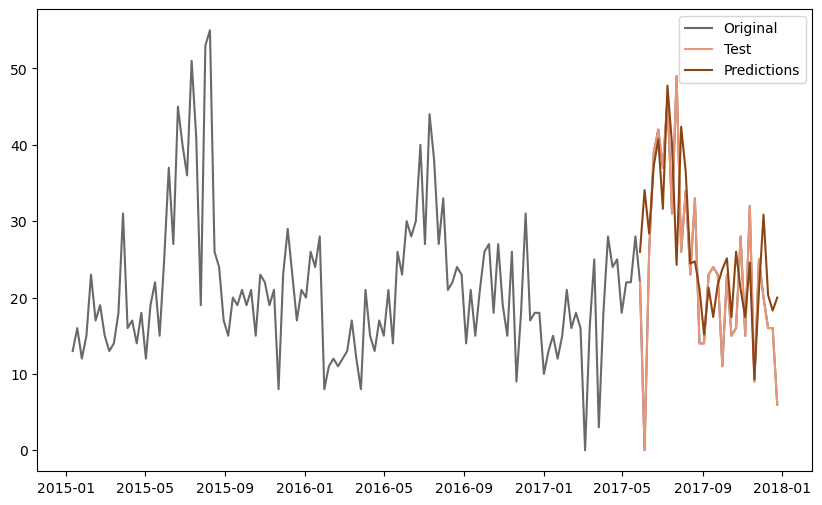

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_campylo, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_sarima_campylo = results.forecast(steps = len(test_campylo))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(campylo, color = 'dimgrey',label='Original')
plt.plot(test_campylo, color='darksalmon', label='Test')
plt.plot(preds_sarima_campylo, color='saddlebrown', label='Predictions')
plt.plot()
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60030D+00    |proj g|=  1.02923D-01


 This problem is unconstrained.



At iterate    5    f=  2.50194D+00    |proj g|=  2.24753D-02

At iterate   10    f=  2.50140D+00    |proj g|=  2.08924D-03

At iterate   15    f=  2.50140D+00    |proj g|=  9.32834D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   5.838D-06   2.501D+00
  F =   2.5013970567953399     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


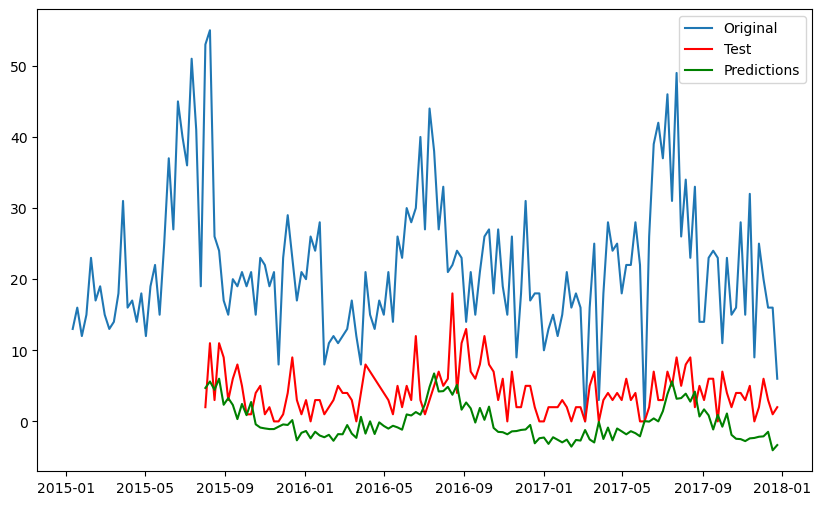

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_crypto, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_sarima_crypto = results.forecast(steps = len(test_crypto))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(crypto, label='Original')
plt.plot(test_crypto, color='red', label='Test')
plt.plot(preds_sarima_crypto, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83068D+00    |proj g|=  2.03235D-01

At iterate    5    f=  1.73245D+00    |proj g|=  3.11053D-02

At iterate   10    f=  1.72704D+00    |proj g|=  1.54499D-03

At iterate   15    f=  1.72673D+00    |proj g|=  1.32630D-03

At iterate   20    f=  1.72666D+00    |proj g|=  3.72928D-04

At iterate   25    f=  1.72665D+00    |proj g|=  3.08655D-04

At iterate   30    f=  1.72664D+00    |proj g|=  5.85699D-04

At iterate   35    f=  1.72664D+00    |proj g|=  1.80140D-04

At iterate   40    f=  1.72664D+00    |proj g|=  3.64083D-05

At iterate   45    f=  1.72664D+00    |proj g|=  8.24403D-05

At iterate   50    f=  1.72664D+00    |proj g|=  8.54280D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


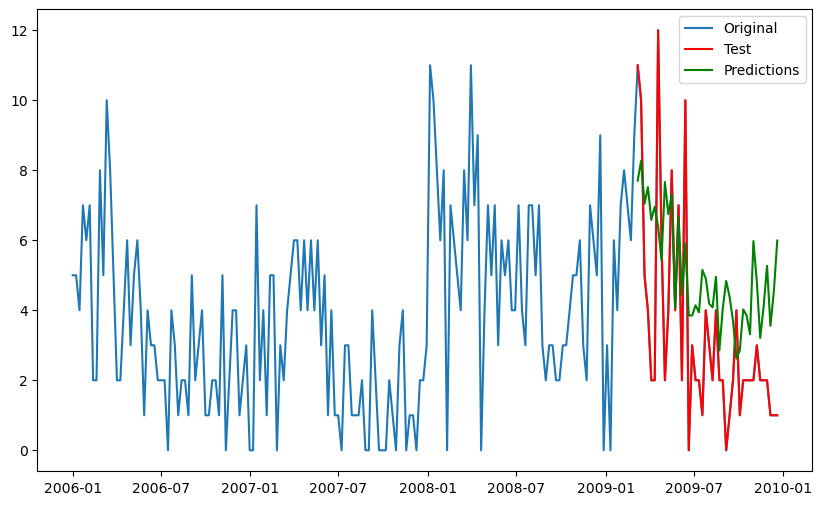

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_strepa, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_sarima_strepa = results.forecast(steps = len(test_strepa))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(strep_a, label='Original')
plt.plot(test_strepa, color='red', label='Test')
plt.plot(preds_sarima_strepa, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90438D+00    |proj g|=  1.90343D-01


 This problem is unconstrained.



At iterate    5    f=  1.77676D+00    |proj g|=  1.16503D-02

At iterate   10    f=  1.77457D+00    |proj g|=  5.69697D-03

At iterate   15    f=  1.77446D+00    |proj g|=  4.43094D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   4.431D-06   1.774D+00
  F =   1.7744618580302802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


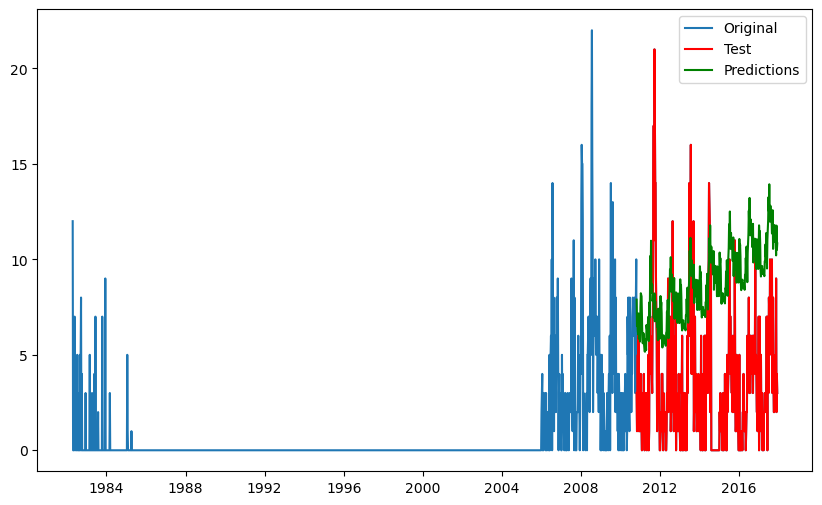

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_legionella, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_sarima_legionella = results.forecast(steps = len(test_legionella))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(legionella, label='Original')
plt.plot(test_legionella, color='red', label='Test')
plt.plot(preds_sarima_legionella, color='green', label='Predictions')
plt.plot()
plt.legend()
plt.show()


In [79]:
import matplotlib.colors as mcolors

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11793D+00    |proj g|=  9.15390D-02


 This problem is unconstrained.



At iterate    5    f=  3.00394D+00    |proj g|=  5.01333D-02

At iterate   10    f=  2.99433D+00    |proj g|=  1.34754D-02

At iterate   15    f=  2.99355D+00    |proj g|=  1.84004D-04

At iterate   20    f=  2.99352D+00    |proj g|=  3.59910D-03

At iterate   25    f=  2.99345D+00    |proj g|=  1.36137D-03

At iterate   30    f=  2.99342D+00    |proj g|=  3.24005D-04

At iterate   35    f=  2.99342D+00    |proj g|=  1.26324D-04

At iterate   40    f=  2.99342D+00    |proj g|=  2.14726D-05

At iterate   45    f=  2.99342D+00    |proj g|=  1.79354D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     54   

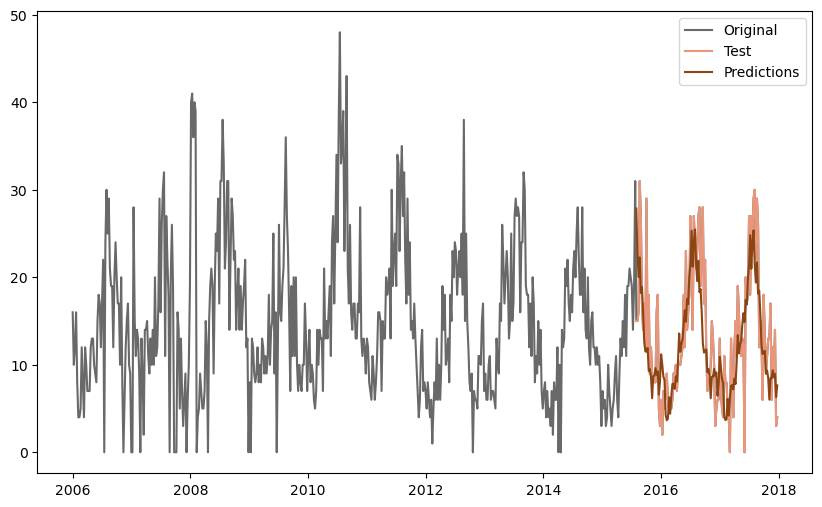

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_salmonella, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_sarima_salmonella = results.forecast(steps = len(test_salmonella))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(salmonella, color = 'dimgrey', label='Original')
plt.plot(test_salmonella, color='darksalmon', label='Test')
plt.plot(preds_sarima_salmonella, color='saddlebrown', label='Predictions')
plt.plot()
plt.legend()
plt.show()


# MSE and MAE for Each

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [98]:
arima_campylo_mse = mean_squared_error(test_campylo, preds_arima_campylo)
arima_campylo_mae = mean_absolute_error(test_campylo, preds_arima_campylo)
sarima_campylo_mse = mean_squared_error(test_campylo, preds_sarima_campylo)
sarima_campylo_mae = mean_absolute_error(test_campylo, preds_sarima_campylo)

print(f"ARIMA MSE: {arima_campylo_mse}, ARIMA MAE: {arima_campylo_mae}")
print(f"SARIMA MSE: {sarima_campylo_mse}, SARIMA MAE: {sarima_campylo_mae}")

ARIMA MSE: 129.8157511905749, ARIMA MAE: 9.015594498606884
SARIMA MSE: 99.76158404496971, SARIMA MAE: 6.796901987018543


In [99]:
rmse_arima_campylo = np.sqrt(arima_campylo_mse) # sqrt of MSE
rmse_sarima_campylo = np.sqrt(sarima_campylo_mse)

target_range_campylo = np.max(test_campylo['CountValue']) - np.min(test_campylo['CountValue']) # Get testing range

percentage_accuracy_arima_campylo = (1.0 - (rmse_arima_campylo / target_range_campylo)) * 100 # Turn into percentage
percentage_accuracy_sarima_campylo = (1.0 - (rmse_sarima_campylo / target_range_campylo)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima_campylo:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima_campylo:.2f}%')



ARIMA accuracy percentage: 76.75%
SARIMA accuracy percentage: 79.62%


In [100]:
arima_crypto_mse = mean_squared_error(test_crypto, preds_arima_crypto)
arima_crypto_mae = mean_absolute_error(test_crypto, preds_arima_crypto)
sarima_crypto_mse = mean_squared_error(test_crypto, preds_sarima_crypto)
sarima_crypto_mae = mean_absolute_error(test_crypto, preds_sarima_crypto)

print(f"ARIMA MSE: {arima_crypto_mse}, ARIMA MAE: {arima_crypto_mae}")
print(f"SARIMA MSE: {sarima_crypto_mse}, SARIMA MAE: {sarima_crypto_mae}")

ARIMA MSE: 10.034578988764084, ARIMA MAE: 2.3966766750123387
SARIMA MSE: 27.088280422687085, SARIMA MAE: 4.499644949292232


In [101]:
rmse_arima_crypto = np.sqrt(arima_crypto_mse) # sqrt of MSE
rmse_sarima_crypto = np.sqrt(sarima_crypto_mse)

target_range_crypto = np.max(test_crypto['CountValue']) - np.min(test_crypto['CountValue']) # Get testing range

percentage_accuracy_arima_crypto = (1.0 - (rmse_arima_campylo / target_range_crypto)) * 100 # Turn into percentage
percentage_accuracy_sarima_crypto = (1.0 - (rmse_sarima_campylo / target_range_crypto)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima_crypto:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima_crypto:.2f}%')



ARIMA accuracy percentage: 36.70%
SARIMA accuracy percentage: 44.51%


In [102]:
arima_strepa_mse = mean_squared_error(test_strepa, preds_arima_strepa)
arima_strepa_mae = mean_absolute_error(test_strepa, preds_arima_strepa)
sarima_strepa_mse = mean_squared_error(test_strepa, preds_sarima_strepa)
sarima_strepa_mae = mean_absolute_error(test_strepa, preds_sarima_strepa)

print(f"ARIMA MSE: {arima_strepa_mse}, ARIMA MAE: {arima_strepa_mae}")
print(f"SARIMA MSE: {sarima_strepa_mse}, SARIMA MAE: {sarima_strepa_mae}")

ARIMA MSE: 18.072507853011853, ARIMA MAE: 4.008898728928021
SARIMA MSE: 8.484094077508312, SARIMA MAE: 2.5036255917067907


In [103]:
rmse_arima_strepa = np.sqrt(arima_strepa_mse) # sqrt of MSE
rmse_sarima_strepa = np.sqrt(sarima_strepa_mse)

target_range_strepa = np.max(test_strepa['CountValue']) - np.min(test_strepa['CountValue']) # Get testing range

percentage_accuracy_arima_strepa = (1.0 - (rmse_arima_strepa / target_range_strepa)) * 100 # Turn into percentage
percentage_accuracy_sarima_strepa = (1.0 - (rmse_sarima_strepa / target_range_strepa)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima_strepa:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima_strepa:.2f}%')



ARIMA accuracy percentage: 64.57%
SARIMA accuracy percentage: 75.73%


In [104]:
arima_legionella_mse = mean_squared_error(test_legionella, preds_arima_legionella)
arima_legionella_mae = mean_absolute_error(test_legionella, preds_arima_legionella)
sarima_legionella_mse = mean_squared_error(test_legionella, preds_sarima_legionella)
sarima_legionella_mae = mean_absolute_error(test_legionella, preds_sarima_legionella)

print(f"ARIMA MSE: {arima_legionella_mse}, ARIMA MAE: {arima_legionella_mae}")
print(f"SARIMA MSE: {sarima_legionella_mse}, SARIMA MAE: {sarima_legionella_mae}")

ARIMA MSE: 23.825377101524435, ARIMA MAE: 4.329500970132887
SARIMA MSE: 40.19132475251864, SARIMA MAE: 5.774481783599883


In [105]:
rmse_arima_legionella = np.sqrt(arima_legionella_mse) # sqrt of MSE
rmse_sarima_legionella = np.sqrt(sarima_legionella_mse)

target_range_legionella = np.max(test_legionella['CountValue']) - np.min(test_legionella['CountValue']) # Get testing range

percentage_accuracy_arima_legionella = (1.0 - (rmse_arima_legionella / target_range_legionella)) * 100 # Turn into percentage
percentage_accuracy_sarima_legionella = (1.0 - (rmse_sarima_campylo / target_range_legionella)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima_legionella:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima_legionella:.2f}%')



ARIMA accuracy percentage: 76.76%
SARIMA accuracy percentage: 52.44%


In [106]:
arima_salmonella_mse = mean_squared_error(test_salmonella, preds_arima_salmonella)
arima_salmonella_mae = mean_absolute_error(test_salmonella, preds_arima_salmonella)
sarima_salmonella_mse = mean_squared_error(test_salmonella, preds_sarima_salmonella)
sarima_salmonella_mae = mean_absolute_error(test_salmonella, preds_sarima_salmonella)

print(f"ARIMA MSE: {arima_salmonella_mse}, ARIMA MAE: {arima_salmonella_mae}")
print(f"SARIMA MSE: {sarima_salmonella_mse}, SARIMA MAE: {sarima_salmonella_mae}")

ARIMA MSE: 163.35483619835284, ARIMA MAE: 11.352244232821304
SARIMA MSE: 26.045311116935196, SARIMA MAE: 3.885796092352017


In [107]:
rmse_arima_salmonella = np.sqrt(arima_salmonella_mse) # sqrt of MSE
rmse_sarima_salmonella = np.sqrt(sarima_salmonella_mse)

target_range_salmonella = np.max(test_salmonella['CountValue']) - np.min(test_salmonella['CountValue']) # Get testing range

percentage_accuracy_arima_salmonella = (1.0 - (rmse_arima_salmonella / target_range_salmonella)) * 100 # Turn into percentage
percentage_accuracy_sarima_salmonella = (1.0 - (rmse_sarima_salmonella / target_range_salmonella)) * 100

print(f'ARIMA accuracy percentage: {percentage_accuracy_arima_salmonella:.2f}%')
print(f'SARIMA accuracy percentage: {percentage_accuracy_sarima_salmonella:.2f}%')



ARIMA accuracy percentage: 58.77%
SARIMA accuracy percentage: 83.54%


# Looks like Salmonella SARIMA and Campylo SARIMA are highest. Lets fix to see if we can get a higher accuracy

# Manual GridSearch

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [85]:
import itertools

# Define the p, d, q parameters to take any values 0 or 1
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

best_score, best_cfg = float("inf"), None

# Grid search for SARIMA parameters
for param in list(itertools.product(p, d, q)):
    try:
        model = SARIMAX(train_salmonella,
                        order=param,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=0)
        predictions = results.get_forecast(steps=len(test_salmonella))
        mse = mean_squared_error(test_salmonella, predictions.predicted_mean)
        if mse < best_score:
            best_score, best_cfg = mse, param
        print('SARIMA{} - AIC:{}, MSE:{}'.format(param, results.aic, mse))
    except Exception as e:
        print('Model failed to fit for SARIMA{}: {}'.format(param, e))
        continue

print('Best SARIMA{} - MSE:{}'.format(best_cfg, best_score))


Model failed to fit for SARIMA(0, 0, 0): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(0, 0, 1): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(0, 0, 2): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(0, 1, 0): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(0, 1, 1): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(0, 1, 2): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(1, 0, 0): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(1, 0, 1): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(1, 0, 2): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(1, 1, 0): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(1, 1, 1): name 'mean_squared_error' is not defined
Model failed to fit for SARIMA(1, 1, 2): name 'mean_squared_error' is not defined
Model failed to 

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22821D+00    |proj g|=  3.38294D-01

At iterate    5    f=  3.05103D+00    |proj g|=  4.61149D-02

At iterate   10    f=  2.99302D+00    |proj g|=  2.42592D-02

At iterate   15    f=  2.98936D+00    |proj g|=  4.74679D-03

At iterate   20    f=  2.98859D+00    |proj g|=  1.67576D-03

At iterate   25    f=  2.98838D+00    |proj g|=  9.22975D-04

At iterate   30    f=  2.98836D+00    |proj g|=  1.04174D-03

At iterate   35    f=  2.98776D+00    |proj g|=  9.38108D-03

At iterate   40    f=  2.98677D+00    |proj g|=  3.45248D-03

At iterate   45    f=  2.98606D+00    |proj g|=  3.65826D-03

At iterate   50    f=  2.98603D+00    |proj g|=  4.17580D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


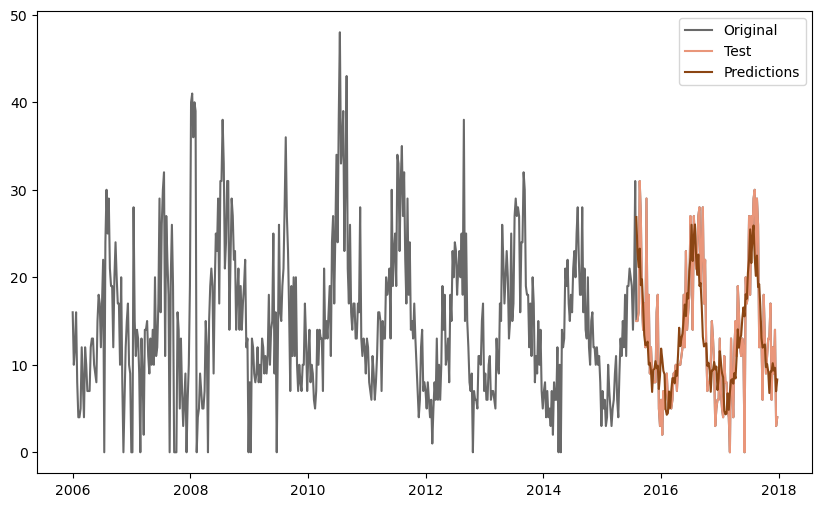

In [86]:
# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_salmonella, order=(3, 1, 2), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_grid_sarima_salmonella = results.forecast(steps = len(test_salmonella))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(salmonella, color = 'dimgrey',label='Original')
plt.plot(test_salmonella, color='darksalmon', label='Test')
plt.plot(preds_grid_sarima_salmonella, color='saddlebrown', label='Predictions')
plt.plot()
plt.legend()
plt.show()


In [89]:
sarima_grid_salmonella_mse = mean_squared_error(test_salmonella, preds_grid_sarima_salmonella)

print(f"SARIMA MSE: {sarima_grid_salmonella_mse}")

rmse_grid_sarima_salmonella = np.sqrt(sarima_grid_salmonella_mse)
target_range_salmonella = np.max(test_salmonella['CountValue']) - np.min(test_salmonella['CountValue']) # Get testing range
percentage_grid_accuracy_sarima_salmonella = (1.0 - (rmse_grid_sarima_salmonella / target_range_salmonella)) * 100
print(f'SARIMA accuracy percentage: {percentage_grid_accuracy_sarima_salmonella:.2f}%')


SARIMA MSE: 24.664043292183823
SARIMA accuracy percentage: 83.98%


In [90]:
# Define the p, d, q parameters to take any values 0 or 1
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

best_score, best_cfg = float("inf"), None

# Grid search for SARIMA parameters
for param in list(itertools.product(p, d, q)):
    try:
        model = SARIMAX(train_campylo,
                        order=param,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=0)
        predictions = results.get_forecast(steps=len(test_campylo))
        mse = mean_squared_error(test_campylo, predictions.predicted_mean)
        if mse < best_score:
            best_score, best_cfg = mse, param
        print('SARIMA{} - AIC:{}, MSE:{}'.format(param, results.aic, mse))
    except Exception as e:
        print('Model failed to fit for SARIMA{}: {}'.format(param, e))
        continue

print('Best SARIMA{} - MSE:{}'.format(best_cfg, best_score))


SARIMA(0, 0, 0) - AIC:1124.79403915731, MSE:696.3225806451613
SARIMA(0, 0, 1) - AIC:1009.6198104061807, MSE:681.7091596637503
SARIMA(0, 0, 2) - AIC:974.4503821396544, MSE:682.2785133732594
SARIMA(0, 1, 0) - AIC:885.0332054493031, MSE:147.16129032258064
SARIMA(0, 1, 1) - AIC:845.0795157518098, MSE:129.79943782024154
SARIMA(0, 1, 2) - AIC:841.2016318905673, MSE:129.8020960278769
SARIMA(1, 0, 0) - AIC:889.213275296649, MSE:291.7728993263265
SARIMA(1, 0, 1) - AIC:853.1595568055434, MSE:123.06391119157902
SARIMA(1, 0, 2) - AIC:849.2107084453772, MSE:122.99814780384165
SARIMA(1, 1, 0) - AIC:867.4262493069972, MSE:136.18076558624463
SARIMA(1, 1, 1) - AIC:847.0790793260426, MSE:129.80303499484123
SARIMA(1, 1, 2) - AIC:838.4416548120244, MSE:128.79359765856506
SARIMA(2, 0, 0) - AIC:867.7039774623389, MSE:162.8129136393497
SARIMA(2, 0, 1) - AIC:862.7037579235997, MSE:153.19909454031185
SARIMA(2, 0, 2) - AIC:846.3099303268659, MSE:122.08226513970503
SARIMA(2, 1, 0) - AIC:836.932198456695, MSE:129

/Users/camilatorres/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05509D+00    |proj g|=  8.19247D-02

At iterate    5    f=  2.03497D+00    |proj g|=  2.88550D-02

At iterate   10    f=  2.03249D+00    |proj g|=  4.85008D-03

At iterate   15    f=  2.03239D+00    |proj g|=  9.15534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   6.824D-06   2.032D+00
  F =   2.0323818946804795     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


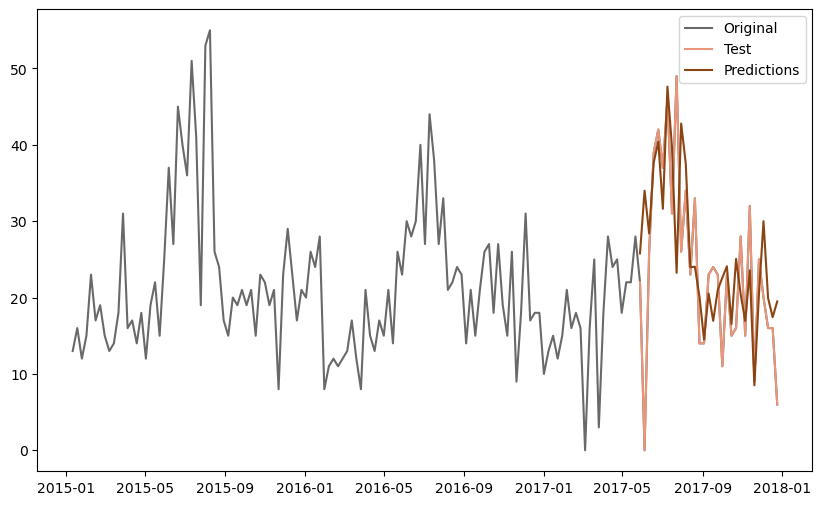

In [91]:
# ARIMA model with seasonal components (SARIMA) specification
model = SARIMAX(train_campylo, order=(2, 0, 2), seasonal_order=(1, 1, 1, 52))
results = model.fit()
preds_grid_sarima_campylo = results.forecast(steps = len(test_campylo))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(campylo, color = 'dimgrey',label='Original')
plt.plot(test_campylo, color='darksalmon', label='Test')
plt.plot(preds_grid_sarima_campylo, color='saddlebrown', label='Predictions')
plt.plot()
plt.legend()
plt.show()


In [92]:
sarima_grid_campylo_mse = mean_squared_error(test_campylo, preds_grid_sarima_campylo)

print(f"SARIMA MSE: {sarima_grid_campylo_mse}")

rmse_grid_sarima_campylo = np.sqrt(sarima_grid_campylo_mse)
target_range_campylo = np.max(test_campylo['CountValue']) - np.min(test_campylo['CountValue']) 
percentage_grid_accuracy_sarima_campylo = (1.0 - (rmse_grid_sarima_campylo / target_range_campylo)) * 100
print(f'SARIMA accuracy percentage: {percentage_grid_accuracy_sarima_campylo:.2f}%')


SARIMA MSE: 99.83469513575959
SARIMA accuracy percentage: 79.61%
